Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jiawen Miao"
COLLABORATORS = ""

---

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Traffic.csv')

# Display the first few rows
print(data.head())

# Display the structure of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-

In [5]:
# Ensure Date is formatted correctly (if needed)
print(data['Date'].unique())  # Verify unique values

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  1  2
  3  4  5  6  7  8  9]


In [6]:
# Convert Time column to datetime.time format
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.time

# Verify the updated column
print(data.head())
print(data.info())

       Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0  00:00:00    10         Tuesday        31          0         4           4   
1  00:15:00    10         Tuesday        49          0         3           3   
2  00:30:00    10         Tuesday        46          0         3           6   
3  00:45:00    10         Tuesday        51          0         2           5   
4  01:00:00    10         Tuesday        57          6        15          16   

   Total Traffic Situation  
0     39               low  
1     55               low  
2     55               low  
3     58               low  
4     94            normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3  

In [ ]:
import matplotlib.pyplot as plt

# Group by Time and calculate average total traffic
time_traffic = data.groupby('Time')['Total'].mean()

# Plot the traffic pattern
plt.figure(figsize=(12, 6))
time_traffic.plot(kind='line')
plt.title('Average Traffic by Time of Day')
plt.xlabel('Time')
plt.ylabel('Average Total Traffic')
plt.grid(True)
plt.show()

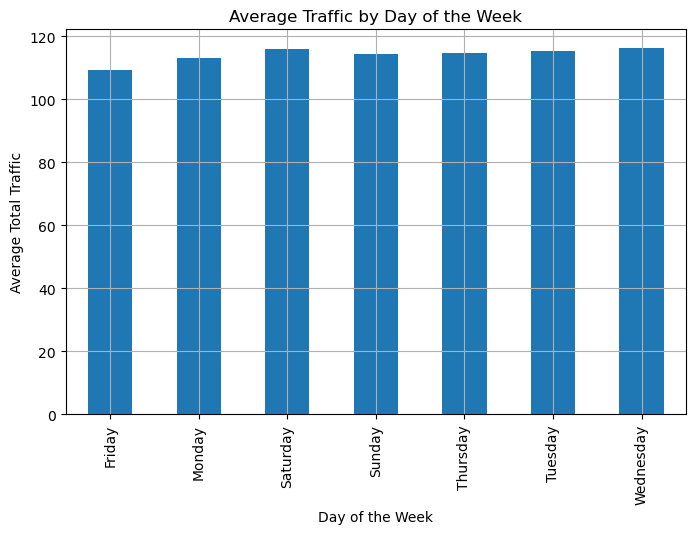

In [8]:
# Group by Day of the Week and calculate average total traffic
weekday_traffic = data.groupby('Day of the week')['Total'].mean()

# Plot the traffic pattern
plt.figure(figsize=(8, 5))
weekday_traffic.plot(kind='bar')
plt.title('Average Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Traffic')
plt.grid(True)
plt.show()

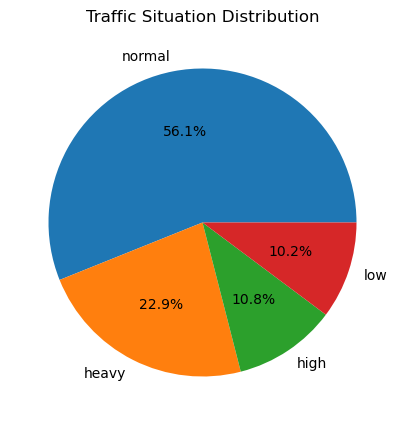

In [9]:
# Count the occurrences of each traffic situation
situation_counts = data['Traffic Situation'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
situation_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Traffic Situation Distribution')
plt.ylabel('')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Day of the week' and 'Traffic Situation'
encoder = LabelEncoder()
data['DayOfWeekEncoded'] = encoder.fit_transform(data['Day of the week'])
data['TrafficSituationEncoded'] = encoder.fit_transform(data['Traffic Situation'])

# Drop the original columns (optional)
data = data.drop(columns=['Day of the week', 'Traffic Situation'])

# Verify the changes
print(data.head())

       Time  Date  CarCount  BikeCount  BusCount  TruckCount  Total  \
0  00:00:00    10        31          0         4           4     39   
1  00:15:00    10        49          0         3           3     55   
2  00:30:00    10        46          0         3           6     55   
3  00:45:00    10        51          0         2           5     58   
4  01:00:00    10        57          6        15          16     94   

   DayOfWeekEncoded  TrafficSituationEncoded  
0                 5                        2  
1                 5                        2  
2                 5                        2  
3                 5                        2  
4                 5                        3  


In [11]:
# Extract hour from Time
data['Hour'] = pd.to_datetime(data['Time'].astype(str), format='%H:%M:%S').dt.hour

# Drop the original 'Time' column if not needed
data = data.drop(columns=['Time'])

# Verify the changes
print(data.head())

   Date  CarCount  BikeCount  BusCount  TruckCount  Total  DayOfWeekEncoded  \
0    10        31          0         4           4     39                 5   
1    10        49          0         3           3     55                 5   
2    10        46          0         3           6     55                 5   
3    10        51          0         2           5     58                 5   
4    10        57          6        15          16     94                 5   

   TrafficSituationEncoded  Hour  
0                        2     0  
1                        2     0  
2                        2     0  
3                        2     0  
4                        3     1  


In [12]:
# Define features and target
X = data[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Hour', 'DayOfWeekEncoded', 'TrafficSituationEncoded']]
y = data['Total']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (2380, 7)
X_test shape: (596, 7)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R2: {r2_lr}")

Linear Regression - MAE: 2.3253583994967708e-14, MSE: 7.610972368520253e-28, R2: 1.0


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - MAE: 2.66, MSE: 13.60, R2: 1.00


In [15]:
# Check if Total is the sum of vehicle counts
data['CalculatedTotal'] = data['CarCount'] + data['BikeCount'] + data['BusCount'] + data['TruckCount']

# Verify mismatches
mismatches = data[data['Total'] != data['CalculatedTotal']]
print(f"Number of mismatches: {len(mismatches)}")

Number of mismatches: 0
